In [1]:
import pandas as pd
import geopandas as gpd
import maup
import time
import matplotlib as plt

maup.progress.enabled = True

/var/folders/zn/0j9hn1px45d1wxt69ppsdtb80000gp/T/ipykernel_99552/2198390189.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# these two files alone take 13 minutes to download (census block level bc there wasnt a precinct shp file)
population_df = gpd.read_file("./ny_pl2020_b/ny_pl2020_p2_b.shp")
vap_df = gpd.read_file("./ny_pl2020_b/ny_pl2020_p4_b.shp")

In [3]:

election_df = gpd.read_file("./ny_2020_gen_2020_blocks/ny_2020_gen_2020_blocks.shp")
cong_df = gpd.read_file("./ny_cong_adopted_2022/CON22_June_03_2022.shp")

In [4]:
print(cong_df.shape) # 28 senate districts

print(population_df.columns)
print(vap_df.columns)
print(cong_df.columns)
print(election_df.columns)

(28, 5)
Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071

In [5]:
print(cong_df)
cong_df.dtypes

    OBJECTID    Shape_Leng    Shape_Area  DISTRICT  \
0          1  3.982402e+05  4.747143e+09         1   
1          2  2.076729e+05  1.482939e+09         2   
2          3  1.468134e+05  6.453502e+08         3   
3          4  1.004443e+05  4.891851e+08         4   
4          5  1.130366e+05  2.913121e+08         5   
5          6  6.043320e+04  6.716070e+07         6   
6          7  5.535552e+04  5.791640e+07         7   
7          8  7.345937e+04  1.158570e+08         8   
8          9  3.511608e+04  3.924811e+07         9   
9         10  9.533722e+02  5.740103e+04        10   
10        11  7.132348e+02  1.893861e+04        10   
11        12  4.488322e+04  6.057440e+07        10   
12        13  8.055368e+04  2.962222e+08        11   
13        14  3.312166e+04  3.514574e+07        12   
14        15  4.217439e+04  3.770423e+07        13   
15        16  6.898629e+04  1.219229e+08        14   
16        17  5.277969e+04  5.163914e+07        15   
17        18  1.014937e+05  

OBJECTID         int64
Shape_Leng     float64
Shape_Area     float64
DISTRICT         int64
geometry      geometry
dtype: object

In [6]:
district_col_name = "DISTRICT"

In [7]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, election_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, election_df.geometry)

100%|██████████| 288819/288819 [04:28<00:00, 1076.46it/s]


In [8]:
pop_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010']

vap_column_names = ['P0040001', 'P0040002', 'P0040005', 'P0040006', 'P0040007',
                    'P0040008', 'P0040009', 'P0040010']

In [9]:
for name in pop_column_names:
    election_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()
for name in vap_column_names:
    election_df[name] = vap_df[name].groupby(vap_blocks_to_precincts_assignment).sum()

In [10]:
print(population_df['P0020001'].sum())
print(election_df['P0020001'].sum())
print(vap_df['P0040001'].sum())
print(election_df['P0040001'].sum())

20201249
20201249
16088135
16088135


In [11]:
# this takes 5 minutes
print(maup.doctor(election_df))

100%|██████████| 288819/288819 [04:22<00:00, 1100.23it/s]
/Users/y.solomon/opt/anaconda3/envs/gerry/lib/python3.12/site-packages/maup/repair.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()


True


In [13]:
print(population_df.crs)
print(cong_df.crs)
print(election_df.crs)

EPSG:4269
EPSG:26918
EPSG:4269


In [14]:
cong_df.to_crs(population_df.crs, inplace=True)

print(election_df.crs)
print(cong_df.crs)

EPSG:4269
EPSG:4269


In [12]:
precincts_to_districts_assignment = maup.assign(election_df.geometry, cong_df.geometry)
election_df["CD"] = precincts_to_districts_assignment

TypeError: the source and target geometries must have the same CRS. EPSG:4269 EPSG:26918

In [ ]:
print(set(election_df["CD"]))
for precinct_index in range(len(election_df)):
    election_df.at[precinct_index, "CD"] = int(cong_df.at[election_df.at[precinct_index, "CD"], "DISTRICT"])
print(set(cong_df[district_col_name]))
print(set(election_df["CD"]))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}
{'23', '16', '01', '19', '03', '25', '14', '15', '04', '20', '06', '07', '08', '09', '02', '24', '27', '10', '12', '13', '11', '21', '17', '18', '26', '22', '05'}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}


In [ ]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER'}

In [ ]:
election_df.rename(columns=rename_dict, inplace = True)

In [ ]:
election_df.drop(columns=[ 'G20PRELJOR','G20PREGHAW', 'G20PREIPIE', 'G20PREOWRI'], inplace=True)

list(election_df.columns)

['GEOID20',
 'STATEFP',
 'COUNTYFP',
 'PRECINCTID',
 'VAP_MOD',
 'G20PRED',
 'G20PRER',
 'geometry',
 'TOTPOP',
 'HISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'VAP',
 'HVAP',
 'WVAP',
 'BVAP',
 'AMINVAP',
 'ASIANVAP',
 'NHPIVAP',
 'OTHERVAP',
 'CD']

<Axes: >

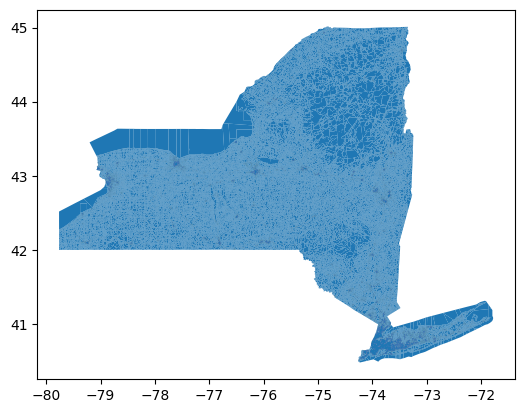

In [ ]:
ny_map = gpd.GeoDataFrame(election_df, geometry='geometry')
ny_map.plot()

## DO NOT RUN THIS UNTIL THE SHP FILE IS TOTALLY READY

In [ ]:
# election_df.to_file("./NY-lab/NY.shp")